In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')
%matplotlib inline

In [3]:
df_wine = pd.read_csv('winemag-data_first150k.csv')
df_wine = df_wine.drop('Unnamed: 0',1)
df_wine = df_wine.drop_duplicates()

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97851 entries, 0 to 149639
Data columns (total 10 columns):
country        97848 non-null object
description    97851 non-null object
designation    67955 non-null object
points         97851 non-null int64
price          89131 non-null float64
province       97848 non-null object
region_1       81919 non-null object
region_2       39491 non-null object
variety        97851 non-null object
winery         97851 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


In [5]:
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
top5c = df_wine['country'].value_counts().head(5).index
top5c

Index(['US', 'Italy', 'France', 'Spain', 'Chile'], dtype='object')

In [7]:
df2 = df_wine[ df_wine['country'].isin(top5c)]    

In [8]:
by_country = df2.groupby('country').mean()
reversed_bycountry = by_country.iloc[::-1]
reversed_bycountry

,points,price
country,,
US,87.908766,34.119130
Spain,86.763182,27.928864
Italy,88.391178,37.911394
France,88.918805,44.905262
Chile,86.281124,19.777027


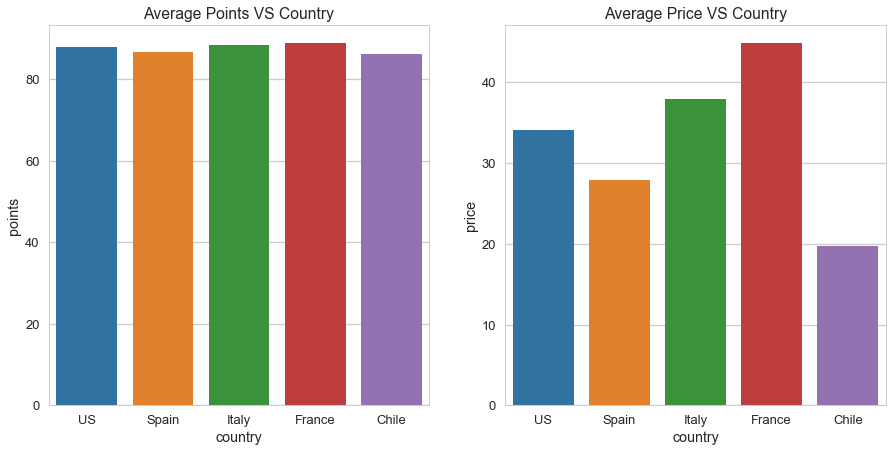

In [9]:
#Plot the average price and review points for the top 5 most appeared countries in the listS
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 7))
sns.barplot(x=reversed_bycountry.index,y='points',data=reversed_bycountry,label='price',ax=ax_1)
sns.barplot(x=reversed_bycountry.index,y='price',data=reversed_bycountry,label='points',ax=ax_2)
ax_1.set_title("Average Points VS Country")
ax_2.set_title('Average Price VS Country')

In [ ]:
sns.boxplot(x="country", y="points", data=df2,palette='rainbow')

In [ ]:
sns.factorplot(x="country", y="points", data=df2,palette='rainbow',kind='violin')

In [ ]:
sns.factorplot(x="country", y="price", data=df2,palette='rainbow',kind='violin')

In [ ]:
#joint plot for points and price for the whole data set
sns.jointplot(x="points", y="price", data=df_wine)

In [ ]:
#variety
top5t = df_wine['variety'].value_counts().head(5)

In [ ]:
top5t.index

In [ ]:
df3 = df2[ df2['variety'].isin(top5t.index)]    

In [ ]:
df3.groupby('variety').mean()

In [10]:
#reviews
df_wine['Length of Reviews'] = df_wine['description'].apply(len)

In [11]:
#group wine by points
pointsg = {'80-84': [80,81,82,83,84],
          '85-89': [85,86,87,88,89],
          '90-94': [90,91,92,93,94],
          '95-100': [95,96,97,98,99,100]}
pointsg.keys()

dict_keys(['80-84', '85-89', '90-94', '95-100'])

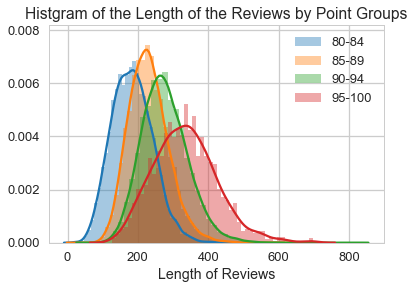

In [12]:
for group in pointsg.keys():
    df4=df_wine[df_wine['points'].isin(pointsg[group])]
    g=sns.distplot(df4['Length of Reviews'],bins=50,label=group).set_title("Histgram of the Length of the Reviews by Point Groups")
plt.legend()
ax=plt.gca()
ylim=ax.get_ylim()
r = ax.set_ylim(ylim[0],ylim[1]+0.001)